In [2]:
#need some cutouts and coordinates
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u

#easiest option would be using a library...assuming it works...but it doesn't?:(
# from statsmodels.distributions.empirical_distribution import ECDF


#quick function to compute EDF given a data set
#following: https://cmdlinetips.com/2019/05/empirical-cumulative-distribution-function-ecdf-in-python/
def edf_calc(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)



#another method: follows https://stackoverflow.com/questions/3209362/how-to-plot-empirical-cdf-in-matplotlib-in-python
#     x = np.sort(data)
#     y = np.arange(len(x))/float(len(x))
    
    
#another another method
#before: following https://stackoverflow.com/questions/17821458/random-number-from-histogram to produce random numbers from an original histogram
#     #Defining the histogram and midpoints of each bin
#     hist = theory[:, 2]
#     bin_midpoints = (theory[:,1] + theory[:,0])/2.

#     #producing a CDF, which can be used to draw numbers from (which can't be intuitively done directly from a histogram)
#     cdf = np.cumsum(hist)
#     cdf = cdf / cdf[-1]

#     #generating random values, which are in turn used to take random values at a certain position in the cdf list...which are then used to pick values from the bin_midpoints (the actual possible x values)
#     values = np.random.rand(N)  	#this returns dimensions (m, n) for the array...or a single list as is here
#     value_bins = np.searchsorted(cdf, values)
#     random_from_cdf = bin_midpoints[value_bins]

#     return edf

# This dictionary defines a colormap in case you want to make a unique colormap?
cdict = {'red':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'green': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Creating a colormap using the dictionary
import matplotlib.colors as colors
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


#a plotting code to review what we're analyzing while in python
#data is the input data
#w is the wcs
#wcscond is True or False, True means the axes will be in RA/Dec, and False means axes in pixels
import matplotlib.pyplot as plt
def implot(data, w, wcscond, vmax_p):
    fig = plt.figure()
    
    if  wcscond == True:
        fig.add_subplot(111, projection=w)
    else:
        fig.add_subplot(111)
    
    #for christmas turn on GnRd
    #plt.cm.get_cmap('Blues', 6) is another option
    #can also use RdBu...
    #otherwise just use plt.cm.viridis b/c it's not bad
    plt.imshow(data, origin='lower', cmap=plt.cm.viridis, vmin =0, vmax=vmax_p)
    plt.xlabel('RA')
    plt.ylabel('Dec')

SystemExit: 

C:\Users\Adam2\Anaconda\envs\mypython3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


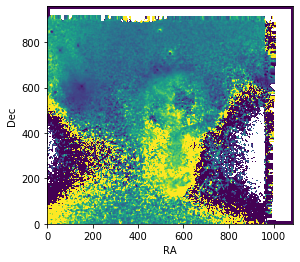

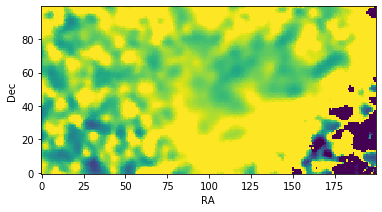

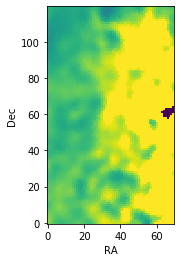

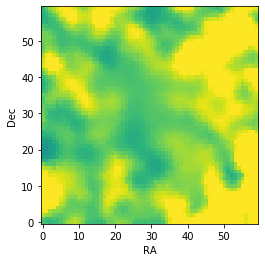

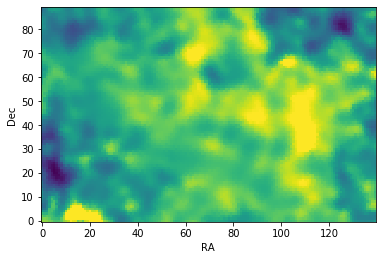

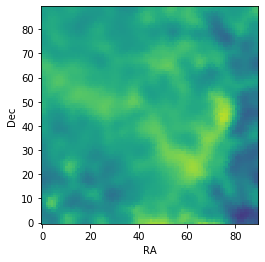

In [3]:
#determining cutout coordinates for each knot...so far just do it by eye and in pixel space
#could probably do it in wcs coords, RA/DEC, but I couldn't get that working

#if you want to try this with various images, glob is the answer for finding files!
import glob
# filenames = glob.glob('../../Convolved_Images_Hub/*126_image*')
# print(filenames)

#some common packages
import sys
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D

#I just make a separate file with images of the 1.26 to 1.64 ratio
# file = '../../Convolved_Images_Hub/conv_126_image.fits'
# file = 'regrid_hub_dash_noleakage_ston_0.8.fits'  #this was the one I used before...
file = 'nonlintest_hub_dash_noleakage_ston_-1.fits'

hdu1 = fits.open(file)        #import image
w = wcs.WCS(hdu1[0].header)   #get wcs coords
data = hdu1[0].data           #get data from hdu
hdu1.close()                  #closing just in case?

#plotting to review what data looks like, need to send wcs regardless
#probably need to make wcs an optional param...
implot(data, w, False, 1)  
#     sys.exit()


#initial guesses for cutout coords of scattered(?) light
#guessing 
# coords_list = [[(90, 700), (85, 130)], 
#               [(580, 645), (40, 80)],
#               [(480, 600), (30, 100)],
#               [(730, 550), (160, 160)],
#               [(420, 500), (180, 80)],
#               [(665, 420), (100, 100)],
#               ]

#actual coords of knots HH 7 - 11
coords_list = [[(550, 170), (100, 200)], 
              [(600, 340), (120, 70)],
              [(460, 395), (60, 60)],
              [(540, 480), (90, 140)],
              [(530, 570), (90, 90)]
              ]

#plotting cutouts, probably better loops for this
for i in range(len(coords_list)):
    #unpacking coords
    position = coords_list[i][0]
    size = coords_list[i][1]
               
    #cutting out coordinates using Cutout2D
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs

    #plotting *cutout*
    implot(datacut, wcscut, False, 1) 
    plt.savefig('knot_HH'+str(i+6)) #+6 b/c of indexing, would have to adjust that and path
    
sys.exit()



SystemExit: 

C:\Users\Adam2\Anaconda\envs\mypython3\lib\site-packages\IPython\core\interactiveshell.py:3334: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


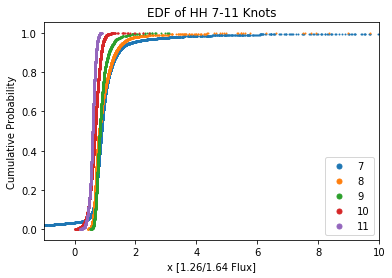

In [5]:
#using cutout coords from above
#plotting an EDF

import glob
# filenames = glob.glob('../../Convolved_Images_Hub/*126_image*')
# print(filenames)

#handling image ^@^@^@^@data
import sys
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D

file = 'nonlintest_hub_dash_noleakage_ston_-1.fits'  #again reading in file

hdu1 = fits.open(file)  #import image
w = wcs.WCS(hdu1[0].header)   #get wcs coords
data = hdu1[0].data   #getting data from hdu
hdu1.close()


#initial guesses for cutout coords of scattered light
# coords_list = [[(90, 700), (85, 130)], 
#               [(580, 645), (40, 80)],
#               [(480, 600), (30, 100)],
#               [(730, 550), (160, 160)],
#               [(420, 500), (180, 80)],
#               [(665, 420), (100, 100)],
#               ]

#guesses for cutout coords of knots HH 7 - 11
coords_list = [[(550, 170), (100, 200)], 
              [(600, 340), (120, 70)],
              [(460, 395), (60, 60)],
              [(540, 480), (90, 140)],
              [(530, 570), (90, 90)]
              ]


#forming cutouts and then making edfs
for i in range(len(coords_list)):
    #unpacking coords
    position = coords_list[i][0]
    size = coords_list[i][1]
               
    #cutting out coordinates
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs
    
#     flatting data, calculating EDFs. plotting
    flat_data = datacut.flatten()
    xedf, yedf = edf_calc(flat_data)
    plt.scatter(xedf, yedf, label = str(i+7), s = 1)

# plt.title('EDF of HH 7-11 Scattered Light Regions')
plt.title('EDF of HH 7-11 Knots')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('Cumulative Probability')
plt.xlim(-1, 10)
plt.legend(loc='best', markerscale = 5)

sys.exit()



knee:  0.6534407062948026
count:  17111.0
0finder:  [198]
0finder:  0.6604861734874797
knee:  0.9477362666914388
count:  7333.0
0finder:  [198]
0finder:  0.6590337962934172
knee:  1.0049859712133729
count:  3447.0
0finder:  [198]
0finder:  0.6863565913349183
knee:  0.9086503195991202
count:  7029.0
0finder:  [198]
0finder:  0.6564389769055878
knee:  0.666739837801448
count:  2138.0
0finder:  [0]
0finder:  0.6500719144123502


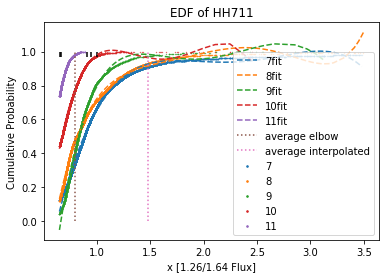

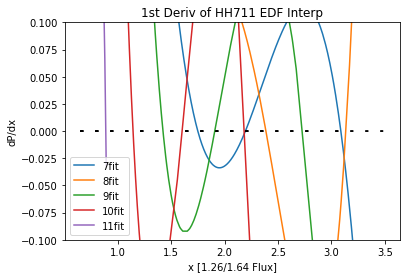

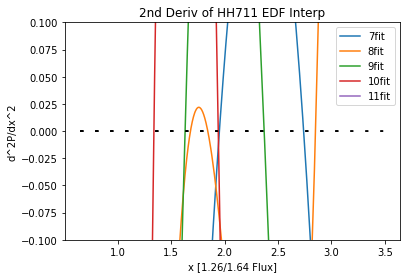

In [44]:
#this cell tries to FIT the EDF turnoff
#the EDF turnoff corresponds to a flattening in the EDF
#unforunately, I always get this vertical bar, which cannot be fit, so I have to restrict my data range

from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from kneed import KneeLocator
import numpy as np
import pandas as pd
import sys
from scipy.interpolate import UnivariateSpline


# file = '1.26_to_1.64_hub_dash_noleakage_ston_0.8.fits'  #reading in file
file = 'nonlintest_hub_dash_noleakage_ston_-1.fits'

hdu1 = fits.open(file)  #import image
w = wcs.WCS(hdu1[0].header)   #get wcs coords
data = hdu1[0].data  #getting data from hdu
hdu1.close()


#coords from above...
coords_list = [[(550, 170), (100, 200)], 
              [(600, 340), (120, 70)],
              [(460, 395), (60, 60)],
              [(540, 480), (90, 140)],
              [(530, 570), (90, 90)]
              ]


#reading in data
for i in range(len(coords_list)):
    #unpacking coords
    position = coords_list[i][0]
    size = coords_list[i][1]
               
    #cutting out coordinates
    cutout = Cutout2D(data, position, size, wcs = w)
    datacut = cutout.data
    wcscut = cutout.wcs

#     flattening data
    flat_data = datacut.flatten()
    xedf, yedf = edf_calc(flat_data)
    
    #restricting data range
    idx = (xedf>0.65)*(xedf<3.5)  #returning mask for array indexing
    yedf = yedf[idx]
    xedf = xedf[idx]
    
    
    
    '''
    #a0 and af are meant to take ranges of values...a0 is the initial value and af is the final value
    #I had to guess and plot to find these...
    #the if conds are picking out each knot
    #unfortunately, each data has a different range and number of values 
    #edf_calc should sort the data, so moving up af for example should be fine
    af = int(1e7)
    if i == 11-7:
        a0 = int(8e3)
    elif i == 8-7: 
        a0 = int(8.2e3)
    elif i == 3: #10
        a0 = int(1.25e4)
#         af = int(1e21)
    elif i == 2: #9
        a0 = int(3.5e3)
    else: #7
        a0 = int(1.95e4)
        
    '''
        
        
    #plotting only a limited range of data to check
    plt.figure(111)
#     plt.scatter(xedf[a0:af], yedf[a0:af], label =  str(i+7), s = 0.1) 
    plt.scatter(xedf, yedf, label =  str(i+7), s = 0.1) 

    
    #one method of fitting the turnoff:
    #trying kneed - an elbow point finder package
    #can adjust curve and direction as per their docs: https://pypi.org/project/kneed/
#     kn = KneeLocator(xedf[a0:af], yedf[a0:af], curve='concave', direction='increasing')
    kn = KneeLocator(xedf, yedf, curve='concave', direction='increasing')
    print('knee: ', kn.knee) #the output directly gives a possible x-value for the turnoff
    
    
    
    #we can also interpolate the data, but I needed to pick a portion of the data for that
    #producing smaller list of values that can be fit with a function
#     arr = np.array([xedf[a0:af], yedf[a0:af]])
    arr = np.array([xedf, yedf])
#     arrx_uni = np.unique(arr, axis=1)
#     arr_nodup = np.unique(arrx_uni, axis=1)
    
    #old
#     arrx_lim = np.array([i for i in arr[0] if i < 4.5])  #another way of restricting x-values
#     arry_lim = arr[1][:len(arrx_lim)]  #restricting y values too?
    
    #based on nonlinfits
    arrx_lim = arr[0]
    arry_lim = arr[1]
    
    #creating smooth curve - interpolating also can fit the data
    dim = 5
    pfit = np.polyfit(arrx_lim, arry_lim, dim)
    f = np.poly1d(pfit)  #interpolating function to be used
    plt.plot(arrx_lim, f(arrx_lim), linestyle='--', label= str(i+7)+'fit')
    plt.plot([kn.knee, kn.knee], [0.97,1], color='black', linestyle='--', dashes=(4, 8))
    
    #plotting derivative to find turning point...
    plt.figure(112)
    deriv_f = np.polyder(f)  #interpolating derivative of function to be used
    plt.plot(arrx_lim, deriv_f(arrx_lim), label= str(i+7)+'fit')
    plt.plot(arrx_lim, [0]*arrx_lim, color = 'black', linestyle='--', dashes=(2, 8))
    
    #and the second derivative
    plt.figure(113)
    deriv2_f = np.polyder(deriv_f)  #interpolating 2nd derivative of function to be used
    plt.plot(arrx_lim, deriv2_f(arrx_lim), label= str(i+7)+'fit')
    plt.plot(arrx_lim, [0]*arrx_lim, color = 'black', linestyle='--', dashes=(2, 8))

    
    #finding min values of derivs, which correspond to crit pts, inflection pts (~ turnoff)
    #...figures out where 0 reddening ratio is
#     setted_list = deriv_f(arrx_lim)
    setted_list = deriv2_f(arrx_lim)
    minimum = float("inf")
    
    
    #finding approx spot of turnoff, though need to refine it by eye
    #I found the indexing determined by "count" is off by 1 or 2 for whatever reason
    value_chosen = 0.
    count = 0.
    for val in setted_list:
        count += 1
        if abs(val - value_chosen) < minimum and count < 200:
            final_value = val
            minimum = abs(val - value_chosen)
    
    print('count: ', count)
    print('0finder: ', [np.where(setted_list == final_value)[0][0]])
    print('0finder: ', arrx_lim[np.where(setted_list == final_value)[0][0]])

    
    #settling on chosen spot confirming with approx location from graph
    #I use count to find this
#     if i == 11-7:
#         print('chosen root: ', arrx_lim[98])
#         plt.plot([arrx_lim[98], arrx_lim[98]], [-0.01, 0.01], color='black', linestyle='--')

#     elif i == 8-7: 
#         print('chosen root: ', arrx_lim[193])
#         plt.plot([arrx_lim[193], arrx_lim[193]], [-0.01, 0.01], color='black', linestyle='--')

#     elif i == 9-7: #9
#         print('chosen root: ', np.mean(np.array([arrx_lim[98], arrx_lim[99]])))
#         avg = np.mean(np.array([arrx_lim[98], arrx_lim[99]]))
#         plt.plot([avg, avg], [-0.01, 0.01], color='black', linestyle='--')

#     elif i == 10-7: #10
#         print('chosen root: ', np.mean(np.array([arrx_lim[96], arrx_lim[97]])))
#         avg = np.mean(np.array([arrx_lim[96], arrx_lim[97]]))
#         plt.plot([avg, avg], [-0.01, 0.01], color='black', linestyle='--')

#     else: #7
#         print('chosen root: ', arrx_lim[487])
#         plt.plot([arrx_lim[487], arrx_lim[487]], [-0.01, 0.01], color='black', linestyle='--')

    
    
    
#formatting figures and legends
plt.figure(111)
# plt.plot([1.911, 1.911], [0.97,1], label ='average elbow', linestyle=':')
# plt.plot([2.82, 2.82], [0.97,1], label ='average elbow', linestyle=':')
plt.plot([0.8, 0.8], [0.,1], label ='average elbow', linestyle=':') #from new try with non linear fits
plt.plot([1.48, 1.48], [0.,1], label ='average interpolated', linestyle=':') #from new try with non linear fits

plt.title('EDF of HH711')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('Cumulative Probability')
# plt.xlim(0.5,3.5)
# plt.ylim(0,1.1)
plt.legend(loc='best', markerscale = 5)
# plt.savefig('../EDFs/HH711EDF.png')
plt.savefig('../EDFs/HH711elbow.png')

plt.figure(112)
plt.title('1st Deriv of HH711 EDF Interp')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('dP/dx')
# plt.xlim(0.5,3.5)
plt.ylim(-0.1, 0.1)
plt.legend(loc='best', markerscale = 5)
plt.savefig('../EDFs/HH711deriv.png')

plt.figure(113)
plt.title('2nd Deriv of HH711 EDF Interp')
plt.xlabel('x [1.26/1.64 Flux]')
plt.ylabel('d^2P/dx^2')
# plt.xlim(0.5,3.5)
plt.ylim(-0.1, 0.1)
plt.legend(loc='best', markerscale = 5)
plt.savefig('../EDFs/HH711deriv2.png')


['regrid_hub_longexp_leakage126_eps_0.001_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.01_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.05_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.1_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.5_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.7_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.8_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_0.9_ston_0.8.fits', 'regrid_hub_longexp_leakage126_eps_9.9_ston_0.8.fits']


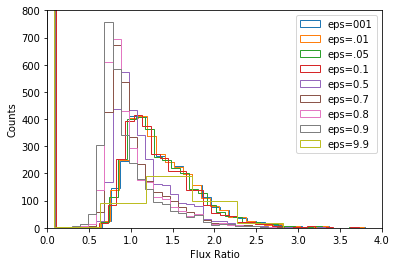

In [10]:
#in case you want to plot a histogram, some example code

import glob
filenames = glob.glob('*.fits')
print(filenames)

#handling image ^@^@^@^@data
import sys

from astropy.io import fits
from astropy import wcs


#HH7 region...mylat and mylon are center coords of a rectangular region, xsize and ysize are the width and length
# mylat = '3h29m08.423s'
# mylon = '+31d15m28.34s'
# xsize  = 95.9
# ysize = 44.753333


for file in filenames:
    hdu1 = fits.open(file)  #import image
    w = wcs.WCS(hdu1[0].header)   #get wcs coords
    data = hdu1[0].data    #grab data
    hdu1.close()
    
#     implot(data, w)     #plot

#     datacut, wcut  = imcrop(mylon, mylat, xsize, ysize, data, w)
#     implot(data[120:170, 500:610], w)  #plotting to confirm
    datacut = data[120:170, 500:610].flatten()  #couldn't get cutout2d working...narrowed in on pixels by hand...should be the same regardless, though

    plt.hist(datacut, bins=40, histtype='step', label='eps='+file[-17:-14])
    plt.legend()
    plt.xlim(0, 4)
    plt.ylim(0, 800)
    plt.xlabel('Flux Ratio')
    plt.ylabel('Counts')




#     plt.savefig('datacut.png')
#     sys.exit()
